**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


## Import data

In [2]:
### set file path
fdiry = file.path(
    FD_RES, 
    "results", 
    "region", 
    "annotation_fcc_table",
    "summary")
fname = "peak.annotation.ChromHMM.tsv"
fpath = file.path(fdiry, fname)

### read table
dat = read_tsv(fpath, show_col_types = FALSE)
dat = dat %>% dplyr::mutate(Label = Label_B)

### assign and show
dat_peak_annot_overlap = dat
print(dim(dat))
head(dat)

[1] 372559     13


Chrom_A,Start_A,End_A,Region_A,Assay_Type,Assay_Label,Annotation,Chrom_B,Start_B,End_B,Region_B,Label_B,Label
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>
chr1,10015,10442,chr1:10015-10442,ATAC,ATAC,ChromHMM,chr1,0,16000,chr1:0-16000,Quies,Quies
chr1,14253,14645,chr1:14253-14645,ATAC,ATAC,ChromHMM,chr1,0,16000,chr1:0-16000,Quies,Quies
chr1,16015,16477,chr1:16015-16477,ATAC,ATAC,ChromHMM,chr1,16000,16200,chr1:16000-16200,TxWk,TxWk
chr1,17237,17772,chr1:17237-17772,ATAC,ATAC,ChromHMM,chr1,17400,17600,chr1:17400-17600,TxWk,TxWk
chr1,28903,29613,chr1:28903-29613,ATAC,ATAC,ChromHMM,chr1,17600,118400,chr1:17600-118400,Quies,Quies
chr1,30803,31072,chr1:30803-31072,ATAC,ATAC,ChromHMM,chr1,17600,118400,chr1:17600-118400,Quies,Quies


In [3]:
dat = dat_peak_annot_overlap
vec = unique(dat$Assay_Type)
print(vec)

  [1] "ATAC"                                                                            
  [2] "ASTARR,ATAC"                                                                     
  [3] "ATAC,WSTARR"                                                                     
  [4] "LMPRA"                                                                           
  [5] "ATAC,CRISPRi-Growth"                                                             
  [6] "ASTARR,ATAC,LMPRA,WSTARR"                                                        
  [7] "WSTARR"                                                                          
  [8] "ASTARR,ATAC,CRISPRi-Growth,LMPRA,WSTARR"                                         
  [9] "ATAC,LMPRA"                                                                      
 [10] "ASTARR,ATAC,LMPRA"                                                               
 [11] "ATAC,LMPRA,WSTARR"                                                               
 [12] "ASTARR,ATAC,WS

## Get count and frequency

In [4]:
### split and expand table by assay type
dat = dat_peak_annot_overlap
dat = dat %>% tidyr::separate_longer_delim(Assay_Type, ",")

### count each
dat1 = dat %>%
    dplyr::group_by(Label, Assay_Type) %>%
    dplyr::summarise(
        Count   = n(), 
        .groups = "drop")

### count total
dat2 = dat %>%
    dplyr::group_by(Assay_Type) %>%
    dplyr::summarise(
        Total   = n(), 
        .groups = "drop")

### merge count
dat = dat1 %>% 
    dplyr::left_join(dat2, by = "Assay_Type") %>%
    dplyr::mutate(Freq = Count / Total)

### assign and show
dat_peak_annot_count = dat
print(dim(dat))
head(dat)

[1] 113   5


Label,Assay_Type,Count,Total,Freq
<chr>,<chr>,<int>,<int>,<dbl>
Biv,ASTARR,1480,36755,0.04026663
Biv,ATAC,12989,272530,0.04766081
Biv,CRISPRi-Growth,577,9493,0.06078163
Biv,LMPRA,2439,55759,0.04374182
Biv,TMPRA,157,5910,0.02656514
Biv,WSTARR,4710,147770,0.03187386


In [6]:
vec_txt_label = c(
    "Tss"        = "Active TSS", 
    "TssFlnk"    = "Flanking TSS", 
    "TssFlnkD"   = "Flanking TSS", 
    "TssFlnkU"   = "Flanking TSS", 
    "Enh1"       = "Enhancer", 
    "Enh2"       = "Enhancer", 
    "EnhG1"      = "Enhancer in gene", 
    "EnhG2"      = "Enhancer in gene", 
    "Tx"         = "Transcription",
    "TxWk"       = "Weak transcription", 
    "Biv"        = "Bivalent",
    "ReprPC"     = "Repressed by Polycomb", 
    "ZNF/Rpts"   = "ZNF genes repeats",
    "Quies"      = "Quiescent", 
    "Het"        = "Heterochromatin")


dat = dat_peak_annot_count
vec = vec_txt_label

dat = dat %>% dplyr::mutate(Label2 = dplyr::recode(Label, !!!vec)) 

dat_peak_annot_count2 = dat
print(dim(dat))
head(dat)

[1] 113   6


Label,Assay_Type,Count,Total,Freq,Label2
<chr>,<chr>,<int>,<int>,<dbl>,<chr>
Biv,ASTARR,1480,36755,0.04026663,Bivalent
Biv,ATAC,12989,272530,0.04766081,Bivalent
Biv,CRISPRi-Growth,577,9493,0.06078163,Bivalent
Biv,LMPRA,2439,55759,0.04374182,Bivalent
Biv,TMPRA,157,5910,0.02656514,Bivalent
Biv,WSTARR,4710,147770,0.03187386,Bivalent


## Visualization

**Plot without ordering**

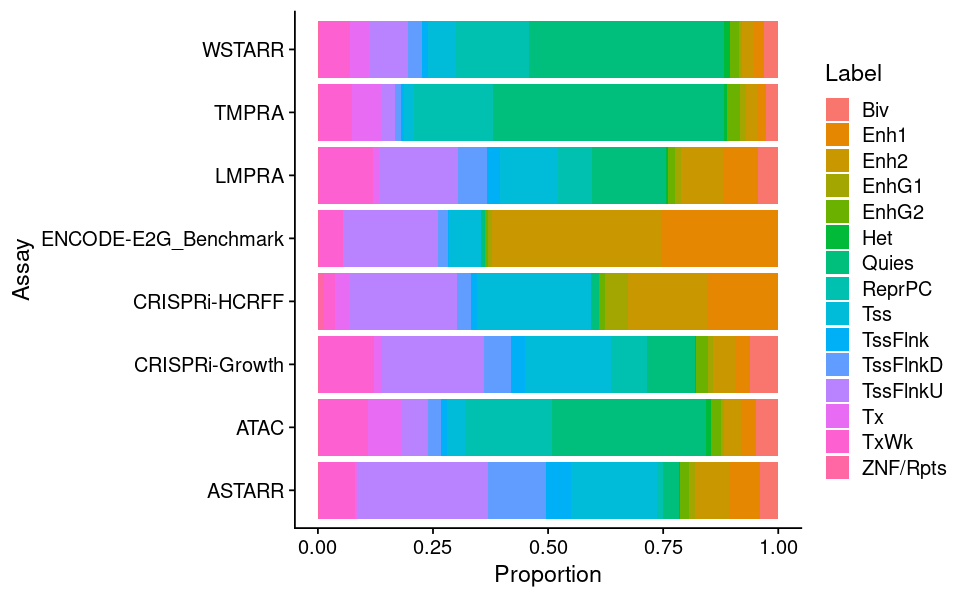

In [7]:
dat = dat_peak_annot_count

gpt = ggplot(dat, aes(x=Assay_Type, y=Freq, fill=Label)) + 
    geom_col() +
    labs(x="Assay", y="Proportion") +
    coord_flip() +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

**Plot with ordering**

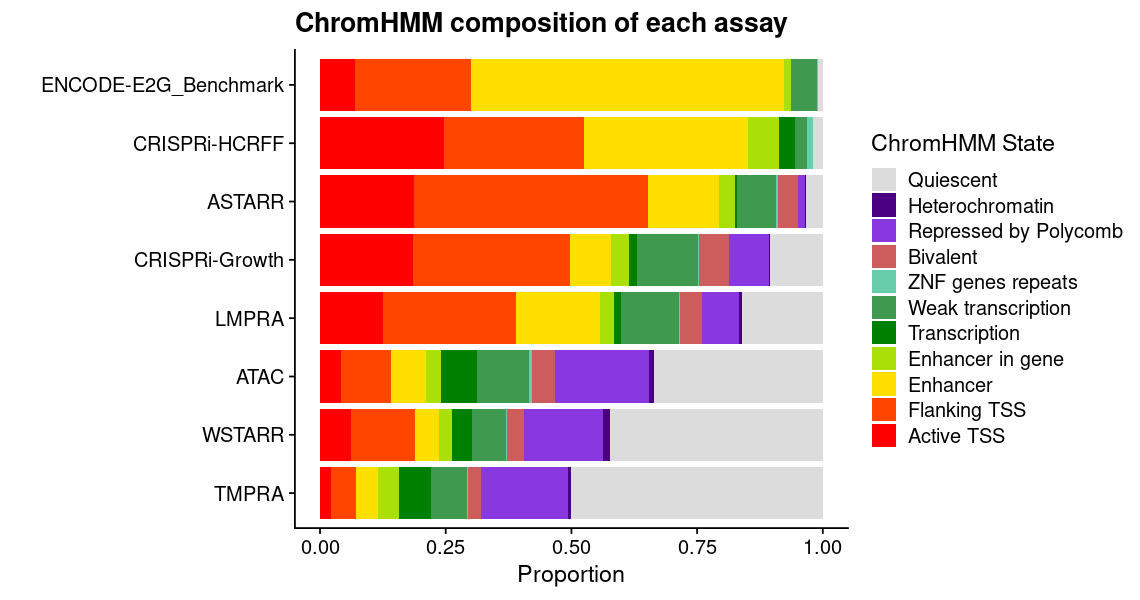

In [11]:
### order Assay
dat = dat_peak_annot_count2
vec = c("Quies", "Het")

dat = dat %>% 
    dplyr::filter(Label %in% vec) %>% 
    dplyr::group_by(Assay_Type) %>%
    dplyr::summarise(Freq = sum(Freq)) %>%
    dplyr::arrange(Freq)

vec_txt_assay = dat$Assay_Type

### order label 1
vec_txt_color1 = c(
    "Tss"        = "#FF0000", 
    "TssFlnk"    = "#FF4500", 
    "TssFlnkD"   = "#FF4500", 
    "TssFlnkU"   = "#FF4500", 
    "Enh1"       = "#FFDF00", 
    "Enh2"       = "#FFDF00", 
    "EnhG1"      = "#AADF07", 
    "EnhG2"      = "#AADF07", 
    "Tx"         = "#008000",
    "TxWk"       = "#3F9A50",
    "Biv"        = "#CD5C5C",
    "ZNF/Rpts"   = "#68cdaa",
    "ReprPC"     = "#8937DF", 
    "Het"        = "#4B0082",
    "Quies"      = "#DCDCDC")

vec_txt_label1 = names(vec_txt_color1)

### order label 2
vec_txt_color2 = c(
    "Active TSS"            = "#FF0000", 
    "Flanking TSS"          = "#FF4500", 
    "Enhancer"              = "#FFDF00", 
    "Enhancer in gene"      = "#AADF07", 
    "Transcription"         = "#008000",
    "Weak transcription"    = "#3F9A50", 
    "ZNF genes repeats"     = "#68cdaa",
    "Bivalent"              = "#CD5C5C",  
    "Repressed by Polycomb" = "#8937DF", 
    "Heterochromatin"       = "#4B0082",
    "Quiescent"             = "#DCDCDC")

vec_txt_label2 = names(vec_txt_color2)

### set factors
dat = dat_peak_annot_count2

dat = dat %>% 
    dplyr::mutate(
        Assay_Type = factor(Assay_Type, levels = rev(vec_txt_assay)),
        Label      = factor(Label,      levels = rev(vec_txt_label1)),
        Label2     = factor(Label2,     levels = rev(vec_txt_label2)),
    ) %>% 
    dplyr::mutate(`ChromHMM State` = Label2)

### plot
theme_fill = scale_fill_manual(values = vec_txt_color2)

gpt = ggplot(dat, aes(x=Assay_Type, y=Freq, fill=`ChromHMM State`)) + 
    geom_col() +
    labs(x="", y="Proportion", title = "ChromHMM composition of each assay") +
    coord_flip() +
    theme_cowplot() +
    theme_fill

### show and save
options(repr.plot.height=5, repr.plot.width=9.5)
print(gpt)
ggsave("fig.fcc_table.chromhmm.proportion.png", gpt, width = 9.5, height = 4.5)
ggsave("fig.fcc_table.chromhmm.proportion.pdf", gpt, width = 9.5, height = 4.5)